## Clasificadores en cascada

OpenCV ofrece la posibilidad de usar [clasificadores en cascada](https://docs.opencv.org/4.x/db/d28/tutorial_cascade_classifier.html) que permiten reconocer elementos en imágenes después de haber hecho el entrnamiento adecuado. La distribución de OpenCV incorpora [aquí](https://github.com/opencv/opencv/tree/4.x/data/haarcascades) varios clasificadores ya entrenados entre los que se encuentran varios para el reconocimeitno de caras.

Los clasificadores en cascada consumen pocos recursos pero tienen problemas con las rotaciones. Un clasificador que reconozca caras vistas de frente no las reconocerá si están de perfil o están inclinadas.

Para hacer la clasificación en cascada primero debemos crear una instancia del clasificador cargando el resultado de un entrenamiento que estará en un fichero con formato xml).

La detección se hará mediante [detectMultiScale](https://docs.opencv.org/4.x/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498)

[**detectMultiScale**(image, scaleFactor, minNeighbors, minSize, maxSize)](https://docs.opencv.org/4.x/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498)
* image (imagen en escala de grises en la que se buscará)
* scaleFactor (por defecto 1.1 - factor de reducción en sucesivas pasadas, cuanto más cercano a 1 más lento y preciso)
* minNeighbors (por defecto 3 - mínimo de vecinos válidos para mantener un candidato)
* minSize (tamaño mínimo de los objetos detectados)
* maxSize (tamaño máximo de los objetos detectados)

El resultado devuelto es un vector de elementos encontrados, indicando para cada uno de ellos la coordenada del punto superior izquierdo del elemento detectado junto con su ancho y alto. 

In [1]:
import cv2
import numpy as np
import cuia

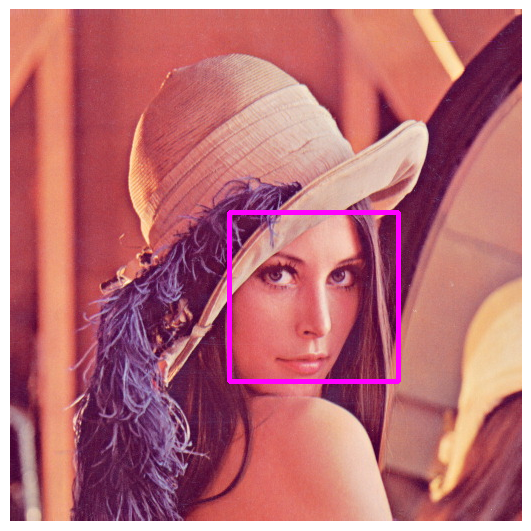

In [2]:
lena=cv2.imread("media/lena.jpg")
lenagris=cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
clasificador = cv2.CascadeClassifier("haarcascade/haarcascade_frontalface_default.xml")
res = clasificador.detectMultiScale(lenagris)
imagen = lena.copy()
for x,y,w,h in res:
    cv2.rectangle(imagen, (x,y), (x+w,y+h),(255,0,255),3)
cuia.plot(imagen)

Los clasificadores en cascada ya preentrenados permiten reconocer caras (en general) pero no nos permiten identificarlas, es decir, no obtenemos información acerca de la semejanza con una cara conocida. Podemos también observar que necesitaremos ajustar adecuadamente los parámetros para hacer una buena detección aunque es muy posible que aparezcan falsos positivos.

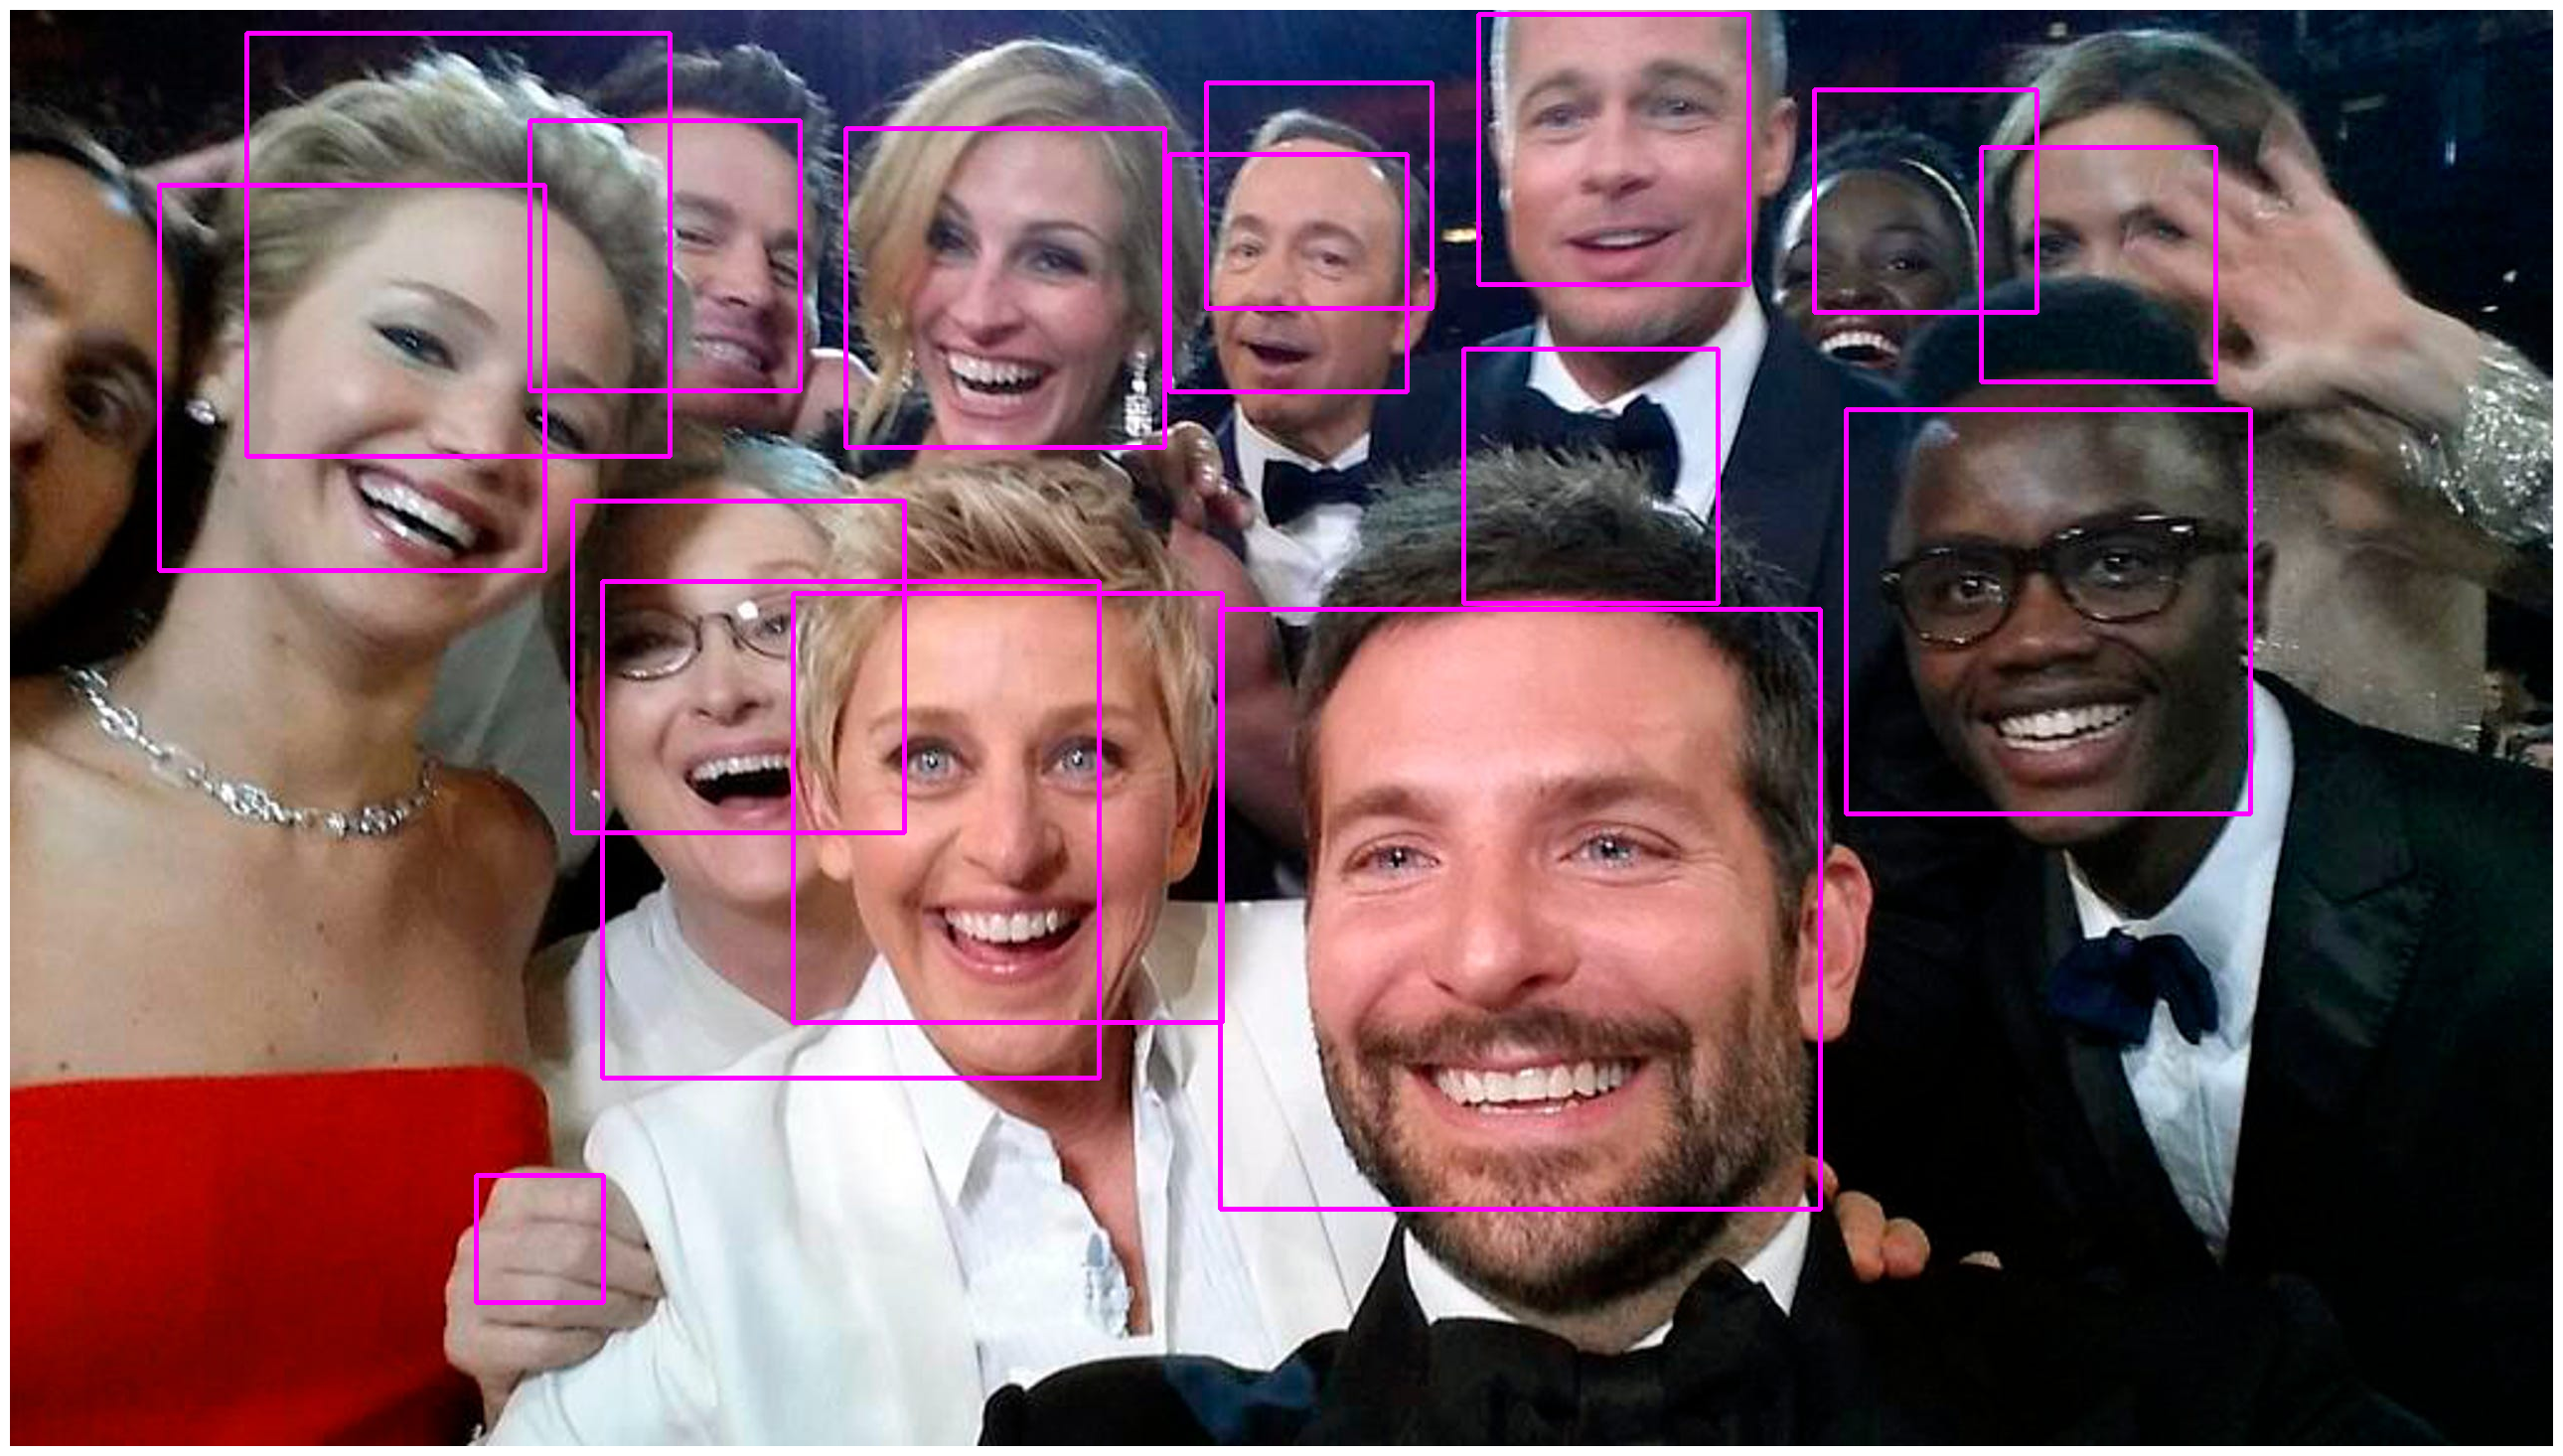

In [3]:
oscars = cv2.imread("media/oscars.jpg")
oscarsgris = cv2.cvtColor(oscars, cv2.COLOR_BGR2GRAY)
clasificador = cv2.CascadeClassifier("haarcascade/haarcascade_frontalface_default.xml")
res = clasificador.detectMultiScale(oscarsgris,
                              scaleFactor=1.01,
                              minNeighbors=3,
                              minSize=(100,100),
                              maxSize=(800,800))
imagen = oscars.copy()
for x,y,w,h in res:
    cv2.rectangle(imagen, (x,y), (x+w,y+h),(255,0,255),3)
cuia.plot(imagen)

In [49]:
def pintaCaras(frame):
    res = frame.copy()
    cc_caras = cv2.CascadeClassifier()
    cc_caras.load("haarcascade/haarcascade_frontalface_default.xml")
    cc_ojos = cv2.CascadeClassifier()
    cc_ojos.load("haarcascade/haarcascade_eye.xml")
    cc_sonrisas = cv2.CascadeClassifier()
    cc_sonrisas.load("haarcascade/haarcascade_smile.xml")
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    caras = cc_caras.detectMultiScale(gris, scaleFactor=1.1, minNeighbors=5)
    for cx,cy,cw,ch in caras:
        cv2.rectangle(res, (cx,cy), (cx+cw,cy+ch), (255,0,255), 10)
        sonrisas = cc_sonrisas.detectMultiScale(gris[cy:cy+ch,cx:cx+cw],scaleFactor=1.05, minNeighbors=50)
        for sx, sy, sw, sh in sonrisas:
            cv2.rectangle(res, (cx+sx,cy+sy), (cx+sx+sw,cy+sy+sh), (0,255,0), 3)
        ojos = cc_ojos.detectMultiScale(gris[cy:cy+ch,cx:cx+cw],scaleFactor=1.05, minNeighbors=10)
        for ox, oy, ow, oh in ojos:
            cv2.circle(res, (cx+ox+ow//2,cy+oy+oh//2), ow//2, (0, 0,255), 3)
    return(res)

In [ ]:
myCam = 0
backend = cuia.bestBackend(myCam)
print(f'El mejor backend es cv2.CAP_{cv2.videoio_registry.getBackendName(backend):s}')

In [50]:
webcam = cuia.myVideo(myCam, backend)
webcam.process = pintaCaras
try:
    webcam.play("PINTACARAS")
finally:
    webcam.release()